In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

Load EEG data as raw mne file and display info

In [2]:
#raw = mne.io.read_raw_brainvision("dados\\SUBJ001\\SUBJ001.vhdr") # EEG + other sensors channels
raw = mne.io.read_raw_eeglab("dados\\SUBJ002\\datasetSubj002.set") #only EEG
print(raw.info)

Reading dados\SUBJ002\datasetSubj002.fdt
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>


<ipython-input-2-c05ab7edb41c>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab("dados\\SUBJ002\\datasetSubj002.set") #only EEG


In [3]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'FT9',
 'FT10',
 'Fpz',
 'CPz']

In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawEEGLAB | datasetSubj002.fdt, 63 x 3685720 (3685.7 s), ~88 kB, data not loaded>

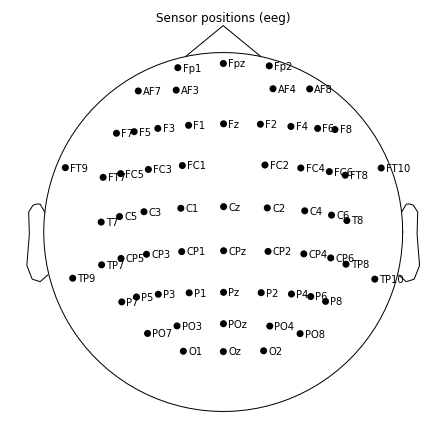

In [5]:
raw.plot_sensors(show_names = True);

Plot EEG signals

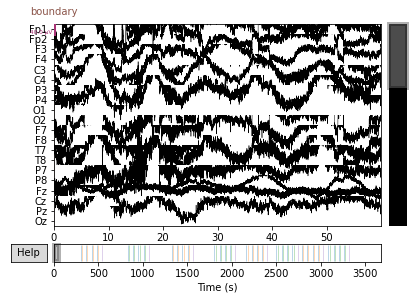

Reading 0 ... 3685719  =      0.000 ...  3685.719 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (16.501 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

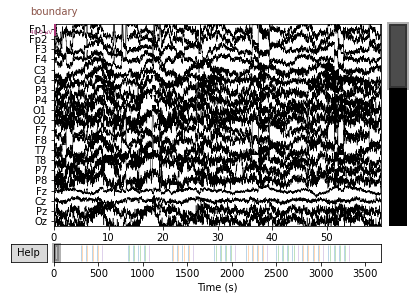

In [6]:
raw.plot(duration=60, n_channels=20, remove_dc=False);
#data, times = raw[raw.ch_names, 10000:310000]
filt_raw = raw.copy()
filt_raw.load_data()
filt_raw.filter(0.2,40)
filt_raw.notch_filter(np.arange(60, 241, 60))
filt_raw.plot(duration=60, n_channels=20, remove_dc=False);

Plot PSD of signals

In [7]:
raw['P3',:][0].shape

(1, 3685720)

Effective window size : 2.048 (s)


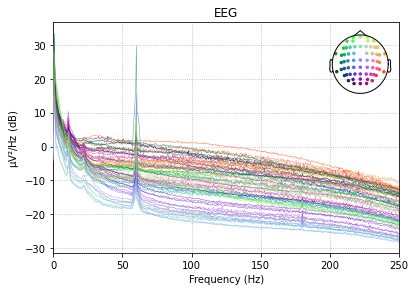

In [8]:
raw.plot_psd(fmax=250);

Apply CSD (Laplacian filter)

Fitted sphere radius:         91.8 mm
Origin head coordinates:      0.9 7.0 48.5 mm
Origin device coordinates:    0.9 7.0 48.5 mm


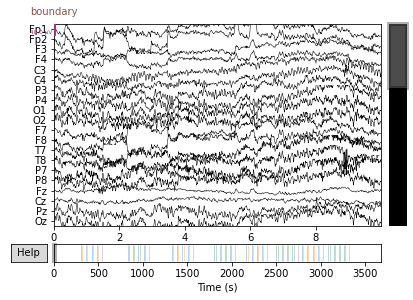

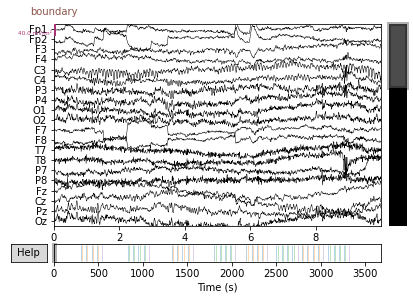

In [12]:
filt_raw_csd = mne.preprocessing.compute_current_source_density(filt_raw)
filt_raw.plot()
filt_raw_csd.plot();

Effective window size : 2.048 (s)


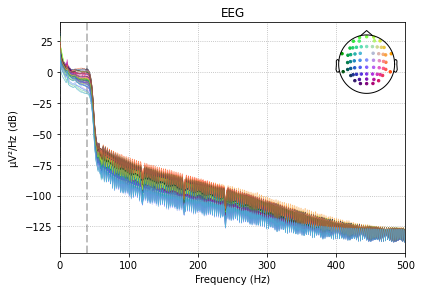

Effective window size : 2.048 (s)


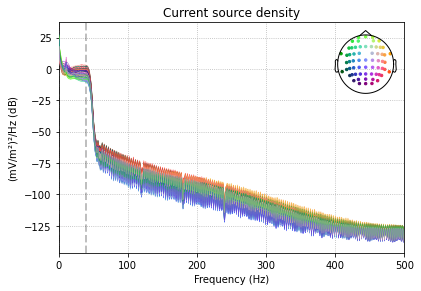

In [15]:
filt_raw.plot_psd()
filt_raw_csd.plot_psd();

Extract data from raw object, pick all channels in a given range, filter it and plot them all

In [ ]:
data, times = raw[raw.ch_names, 10000:310000]
data_filter = mne.filter.filter_data(data,raw.info['sfreq'],0.1,40)
plt.figure()
for ch in range(len(raw.ch_names)):
    plt.plot(times,data_filter[ch,:], label = raw.ch_names[ch])
plt.legend()

Pick a given channel in a given range, filter it and plot

In [ ]:
raw_temp = raw.copy()
picks = raw_temp.pick_channels(['O2'])

In [ ]:
data, times = raw_temp[raw_temp.ch_names, 10000:310000]
data_filter = mne.filter.filter_data(data,raw_temp.info['sfreq'],0.1,40)
plt.figure()
plt.plot(times,data_filter[0,:])


In [ ]:
raw_components = raw.copy()
picks = raw_components.pick_channels(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8'])

Detect ECG artifacts

In [ ]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw_components, ch_name = 'F3')
ecg_epochs.plot_image(combine='mean')

In [ ]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw)
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

Apply ICA

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(filt_raw)
raw.load_data()

In [ ]:
ica.plot_sources(filt_raw, [0,1,2,3,4,5,6,7,8], start=50,stop=70)
#ca.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(filt_raw)

In [ ]:
ica.plot_components()

In [ ]:
raw.info

Fica evidente que a terceira componente (002) se trata do oculograma e neste caso pode ser removida.